## Compare Train/Test split with LOOCV using FF with 2 Hidden Layers

Como o dataset possui poucas linhas de dados, foi comparado a tecnica da separação por train/test com a Leave-one-out Cross Validation (LOOCV)

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = './data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = './data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = x_train.shape[1]

Using TensorFlow backend.


### 1) Train / test split

80% train / 20% test / 0% validation split


**Feed forward with 1 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'softplus', output(none)

**optimizer:** adamax

**loss:** MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
<IPython.core.display.Image object>
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 56)                3192      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 57        
Total params: 3,249
Trainable params: 3,249
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

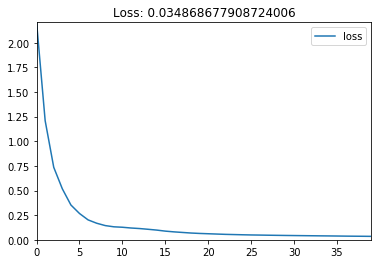

    Prediction      Real     % error
8     8.012764  8.491036    5.632669
0     7.468762  8.075241    7.510352
7     5.235327  5.156991    1.519028
9     4.744020  4.785659    0.870065
2     4.775811  4.616062    3.460708
1     5.368871  3.669486   46.311252
6     3.859457  3.491649   10.533923
3     3.028416  3.003443    0.831479
10    2.798431  1.377930  103.089430
5     0.930011  0.900556    3.270704
4     1.561658  0.667981  133.787698


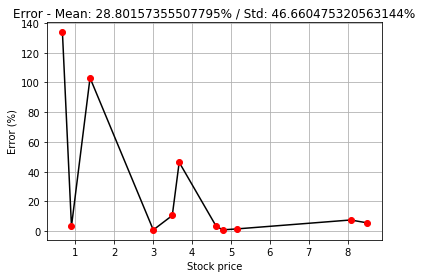

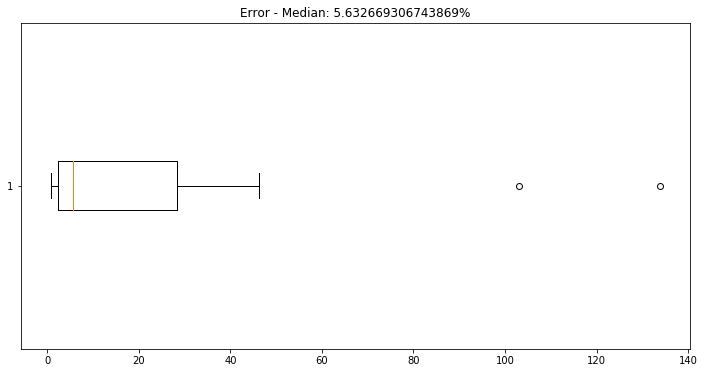

count     11.000000
mean      28.801574
std       46.660475
min        0.831479
25%        2.394866
50%        5.632669
75%       28.422588
max      133.787698
Name: % error, dtype: float64
Remove outliers from results and recalculate loss
   Prediction      Real    % error
8    8.012764  8.491036   5.632669
0    7.468762  8.075241   7.510352
7    5.235327  5.156991   1.519028
9    4.744020  4.785659   0.870065
2    4.775811  4.616062   3.460708
1    5.368871  3.669486  46.311252
6    3.859457  3.491649  10.533923
3    3.028416  3.003443   0.831479
5    0.930011  0.900556   3.270704


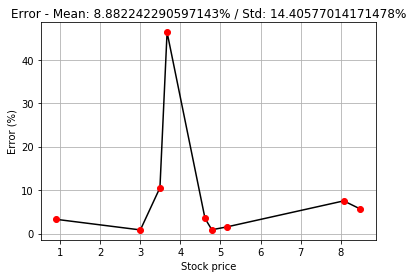

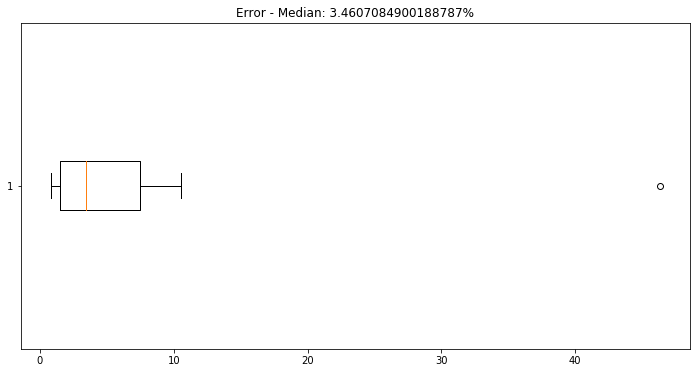

count     9.000000
mean      8.882242
std      14.405770
min       0.831479
25%       1.519028
50%       3.460708
75%       7.510352
max      46.311252
Name: % error, dtype: float64
MSE of training: 0.03409709171815352
MSE of testing: 0.09468813240528107
MSE of testing without first outliers: 0.06535978615283966


In [2]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer]
activations = ['softplus']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations, optimizer='adamax')
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
best_model_results = tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler, model_name='FF | Softplus | Adamax')

### LOOCV implementation

### 2) K-Fold Cross Validation where test set = 1 row (LOOCV)

Training and gathering results for 55 iterations

**Feed forward with 1 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns), output(1)

**activations:** input(none), 'softplus', output(none)

**optimizer:** adamax

**loss:** MSE

Training K-Fold: 1/55
Training K-Fold: 2/55
Training K-Fold: 3/55
Training K-Fold: 4/55
Training K-Fold: 5/55
Training K-Fold: 6/55
Training K-Fold: 7/55
Training K-Fold: 8/55
Training K-Fold: 9/55
Training K-Fold: 10/55
Training K-Fold: 11/55
Training K-Fold: 12/55
Training K-Fold: 13/55
Training K-Fold: 14/55
Training K-Fold: 15/55
Training K-Fold: 16/55
Training K-Fold: 17/55
Training K-Fold: 18/55
Training K-Fold: 19/55
Training K-Fold: 20/55
Training K-Fold: 21/55
Training K-Fold: 22/55
Training K-Fold: 23/55
Training K-Fold: 24/55
Training K-Fold: 25/55
Training K-Fold: 26/55
Training K-Fold: 27/55
Training K-Fold: 28/55
Training K-Fold: 29/55
Training K-Fold: 30/55
Training K-Fold: 31/55
Training K-Fold: 32/55
Training K-Fold: 33/55
Training K-Fold: 34/55
Training K-Fold: 35/55
Training K-Fold: 36/55
Training K-Fold: 37/55
Training K-Fold: 38/55
Training K-Fold: 39/55
Training K-Fold: 40/55
Training K-Fold: 41/55
Training K-Fold: 42/55
Training K-Fold: 43/55
Training K-Fold: 44/

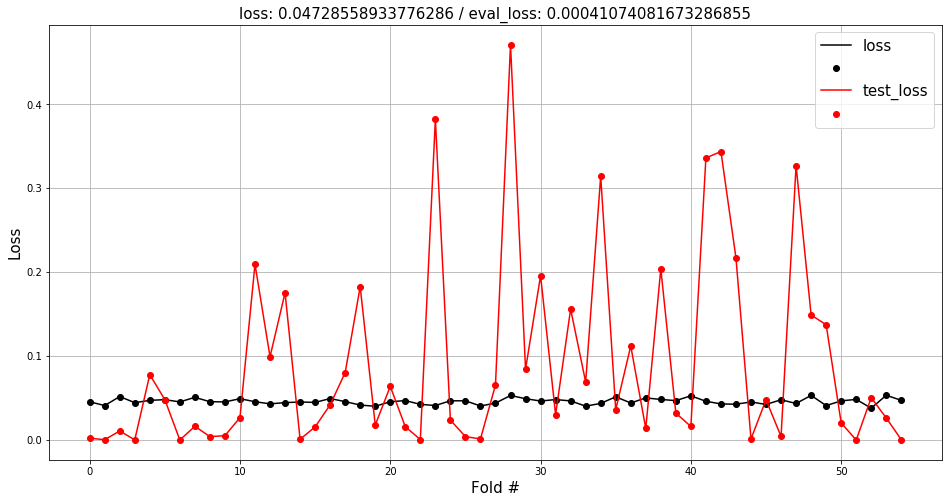

    Prediction      Real     % error
7     8.754040  8.770985    0.193193
25    8.105876  8.491036    4.536078
44    7.271192  8.434865   13.795991
11    8.514612  8.106093    5.039662
16    7.762721  8.075241    3.870105
39    6.801999  7.930000   14.224482
36    8.168938  7.693247    6.183230
17    7.154601  7.666291    6.674537
4     7.047342  7.084401    0.523116
28    7.556624  6.917610    9.237498
19    6.996182  5.928323   18.012839
20    4.948402  5.281612    6.308864
54    5.561963  5.156991    7.852874
34    4.243694  4.900166   13.396921
55    4.845121  4.794493    1.055961
1     4.667644  4.785659    2.466009
8     4.444597  4.764059    6.705658
37    3.913767  4.749780   17.601099
15    4.691579  4.616062    1.635953
6     4.023426  4.571799   11.994692
35    3.164296  4.564561   30.676889
5     5.202827  4.505757   15.470641
32    4.926771  4.492191    9.674103
12    5.471495  4.328178   26.415670
26    4.138412  4.297708    3.706527
29    5.383805  3.669486   46.718232
2

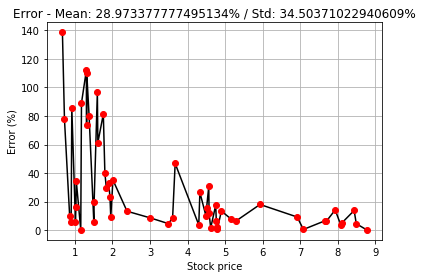

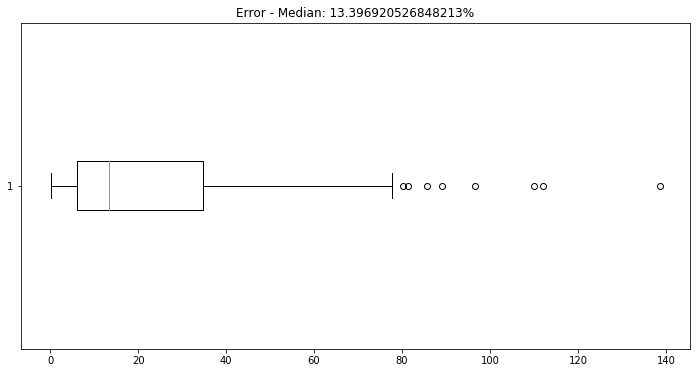

count     55.000000
mean      28.973378
std       34.503710
min        0.193193
25%        6.062440
50%       13.396921
75%       34.768454
max      138.609084
Name: % error, dtype: float64

Execution time
CPU times: user 1min 23s, sys: 2.9 s, total: 1min 26s
Wall time: 1min 25s


In [3]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

# Get X and Y datasets
x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)

# Setting early stopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=100)

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

# LOOCV: k-fold cross validation (folds=x.shape[0], shuffle=True, seed=1)
kfold = KFold(x.shape[0], True, 1)

# Neural Network layers
layers = [number_hidden_layer]
activations = ['softplus']

# Run LOOCV and get results
results_loss, results_evaluate, prediction_results = tcc_utils.loocv(x, y, kfold, gl_normal, 
                                layers, activations, y_scaler, optimizer='adamax')

# Evaluate results
tcc_utils.plot_loss_eval(results_loss, results_evaluate)
tcc_utils.print_and_plot_results(prediction_results)

print('')
print('Execution time')

In [4]:
# Evaluation Loss Mean
print(f'Evaluation Loss Mean: {results_evaluate.mean()}')
print(f'Evaluation Loss Std: {results_evaluate.std()}')

Evaluation Loss Mean: 0.09032760557912421
Evaluation Loss Std: 0.11501034912293522


In [5]:
best_model_results

,Model Name,Testing MSE,Testing MSE after removing outlier,Training MSE
0,FF | Softplus | Adamax,0.094688,0.06536,0.034097


In [6]:
import pandas as pd

loocv_df = {'Model Name': ['LOOCV'], 'Testing MSE': results_evaluate.mean(), 'MSE std': results_evaluate.std()}
loocv_df = pd.DataFrame(data=loocv_df)
loocv_df = loocv_df.append(best_model_results, ignore_index=True, sort=False)
loocv_df.to_csv(r'./results/loocv-results.csv')
loocv_df

,Model Name,Testing MSE,MSE std,Testing MSE after removing outlier,Training MSE
0,LOOCV,0.090328,0.11501,NaN,NaN
1,FF | Softplus | Adamax,0.094688,NaN,0.06536,0.034097
